In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pymc3 as pm
import os

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = pd.read_csv('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/booking_original.csv')

In [3]:
df.head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [4]:
# Perform random sampling of 10,000 observations
df1 = df.sample(n=3000, random_state=42)  # Use a specific random_state for reproducibility

# Display the resulting DataFrame
print(df1)

      Booking_ID  number of adults  number of children  \
36238   INN36239                 1                   0   
83      INN00084                 2                   0   
23449   INN23450                 1                   0   
14981   INN14982                 1                   0   
18392   INN18393                 2                   0   
...          ...               ...                 ...   
30681   INN30682                 2                   0   
21525   INN21526                 3                   0   
9838    INN09839                 2                   0   
24301   INN24302                 3                   0   
14798   INN14799                 1                   0   

       number of weekend nights  number of week nights  type of meal  \
36238                         0                      1  Not Selected   
83                            1                      4   Meal Plan 1   
23449                         0                      1   Meal Plan 1   
14981          

In [5]:
df1.rename(columns={'Booking_ID':'Booking_ID','number of adults':'number_of_adults', 'number of children':'number_of_children',
                   'number of weekend nights':'number_of_weekend_nights', 'number of week nights':'number_of_week_nights',
                   'type of meal':'type_of_meal','car parking space':'car_parking_space', 'room type':'room_type',
                   'lead time':'lead_time', 'market segment type':'market_segment_type','number of adults':'number_of_adults', 'average price':'average_price','special requests':'special_requests', 
                  'date of reservation':'date_of_reservation','booking status':'booking_status'}, inplace=True)

In [6]:
df1.head(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
36238,INN36239,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,11/10/2018,Canceled
83,INN00084,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,3/14/2018,Not_Canceled
23449,INN23450,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,6/22/2018,Not_Canceled


In [7]:
df1.tail(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
9838,INN09839,2,0,0,3,Meal Plan 1,0,Room_Type 1,44,Offline,0,0,0,75.0,0,2/17/2018,Not_Canceled
24301,INN24302,3,0,0,2,Meal Plan 1,0,Room_Type 4,61,Online,0,0,0,168.3,0,8/17/2018,Canceled
14798,INN14799,1,0,0,2,Meal Plan 1,0,Room_Type 1,52,Online,0,0,0,90.0,0,11/3/2018,Canceled


In [8]:
df1.describe

<bound method NDFrame.describe of       Booking_ID  number_of_adults  number_of_children  \
36238   INN36239                 1                   0   
83      INN00084                 2                   0   
23449   INN23450                 1                   0   
14981   INN14982                 1                   0   
18392   INN18393                 2                   0   
...          ...               ...                 ...   
30681   INN30682                 2                   0   
21525   INN21526                 3                   0   
9838    INN09839                 2                   0   
24301   INN24302                 3                   0   
14798   INN14799                 1                   0   

       number_of_weekend_nights  number_of_week_nights  type_of_meal  \
36238                         0                      1  Not Selected   
83                            1                      4   Meal Plan 1   
23449                         0                      

In [9]:
df1.shape

(3000, 17)

In [10]:
df1.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [11]:
df1.isna().sum()

Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 36238 to 14798
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                3000 non-null   object 
 1   number_of_adults          3000 non-null   int64  
 2   number_of_children        3000 non-null   int64  
 3   number_of_weekend_nights  3000 non-null   int64  
 4   number_of_week_nights     3000 non-null   int64  
 5   type_of_meal              3000 non-null   object 
 6   car_parking_space         3000 non-null   int64  
 7   room_type                 3000 non-null   object 
 8   lead_time                 3000 non-null   int64  
 9   market_segment_type       3000 non-null   object 
 10  repeated                  3000 non-null   int64  
 11  P-C                       3000 non-null   int64  
 12  P-not-C                   3000 non-null   int64  
 13  average_price             3000 non-null   float64
 14  spe

In [13]:
df1['booking_status'].value_counts()
print(df1['booking_status'].value_counts())

Not_Canceled    2011
Canceled         989
Name: booking_status, dtype: int64


In [14]:
df1 = df1.drop(['Booking_ID', 'date_of_reservation'], axis=1)

In [15]:
df1

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
36238,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,Canceled
83,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,Not_Canceled
23449,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,Not_Canceled
14981,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,Online,0,0,0,1.00,0,Not_Canceled
18392,2,0,1,0,Meal Plan 1,0,Room_Type 1,141,Offline,0,0,0,90.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30681,2,0,1,2,Meal Plan 1,0,Room_Type 4,7,Online,0,0,0,145.00,2,Not_Canceled
21525,3,0,1,3,Meal Plan 1,0,Room_Type 4,63,Online,0,0,0,142.20,2,Not_Canceled
9838,2,0,0,3,Meal Plan 1,0,Room_Type 1,44,Offline,0,0,0,75.00,0,Not_Canceled
24301,3,0,0,2,Meal Plan 1,0,Room_Type 4,61,Online,0,0,0,168.30,0,Canceled


In [16]:
df1 = pd.get_dummies(df1, columns=['type_of_meal', 'room_type', 'market_segment_type'])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 36238 to 14798
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   3000 non-null   int64  
 1   number_of_children                 3000 non-null   int64  
 2   number_of_weekend_nights           3000 non-null   int64  
 3   number_of_week_nights              3000 non-null   int64  
 4   car_parking_space                  3000 non-null   int64  
 5   lead_time                          3000 non-null   int64  
 6   repeated                           3000 non-null   int64  
 7   P-C                                3000 non-null   int64  
 8   P-not-C                            3000 non-null   int64  
 9   average_price                      3000 non-null   float64
 10  special_requests                   3000 non-null   int64  
 11  booking_status                     3000 non-null   

In [18]:
feature_columns = ['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']
target_column = 'booking_status'

In [19]:
X = df1[feature_columns]
y = df1[target_column]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#X = df1.drop('booking_status', axis=1)  ######need later maybe
#y = df1['booking_status']

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ######need later maybe

In [23]:
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)

In [24]:
X_num = train_data.select_dtypes(include = ['int64', 'float64', 'datetime'])

In [25]:
path = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph'

In [26]:
os.mkdir(path)

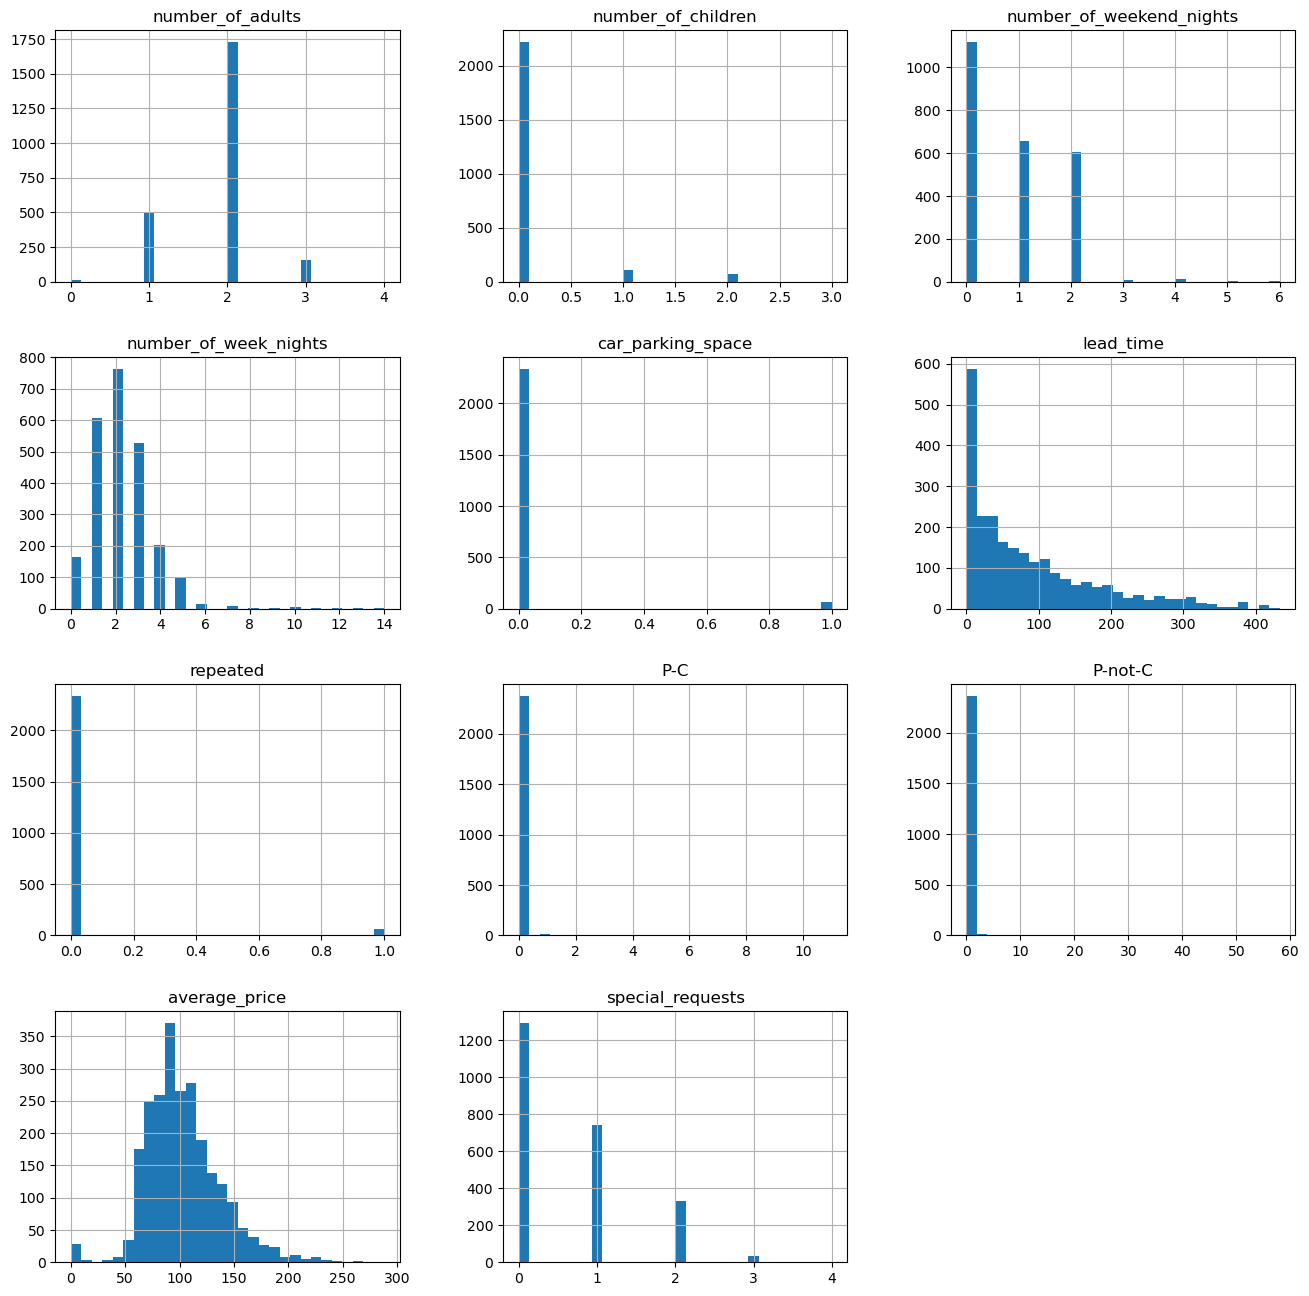

In [27]:
X_num.hist(bins = 30, figsize = (16, 16));
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/histogram_plot.png')
plt.show()

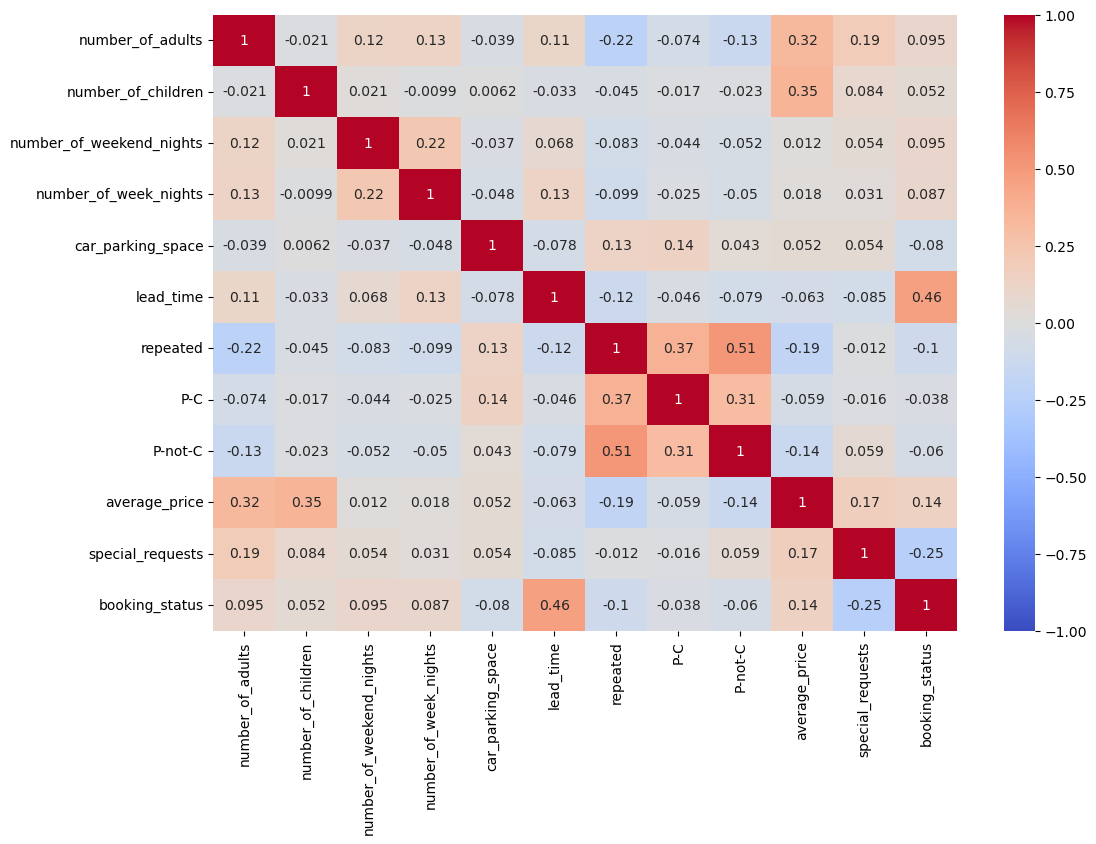

In [28]:
corr = pd.concat([X_num, (y_train == 'Canceled')], axis = 1).corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/correlation.png')

In [29]:
train_data.shape 

(2400, 26)

In [30]:
test_data.shape  

(600, 26)

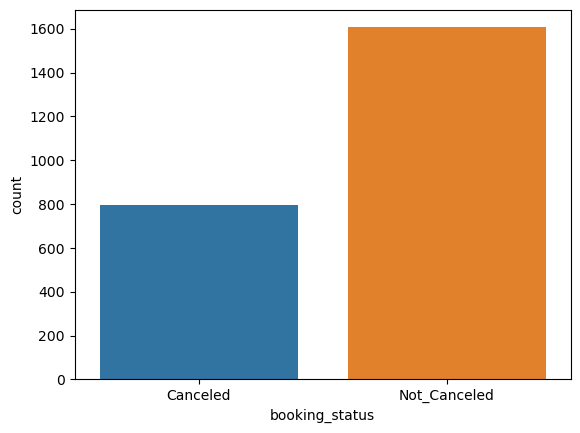

In [31]:
sns.countplot(x = y_train)
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/train_data.png')
plt.show()

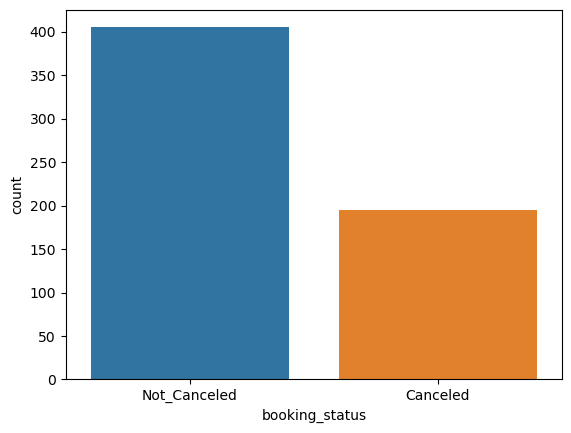

In [32]:
sns.countplot(x = y_test)
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/test_data.png')
plt.show()

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

lead_time                   0.438062
average_price               0.283755
number_of_week_nights       0.089484
special_requests            0.082826
number_of_weekend_nights    0.051151
number_of_adults            0.037951
number_of_children          0.016771
dtype: float64


In [35]:
print(df1.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Not Selected', 'room_type_Room_Type 1',
       'room_type_Room_Type 2', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [36]:
selected_columns_1 = ['lead_time', 'number_of_adults',
                     'number_of_children', 'number_of_weekend_nights',
                     'number_of_week_nights', 'special_requests',
                     'average_price', 'booking_status']
selected_df = df1[selected_columns_1]

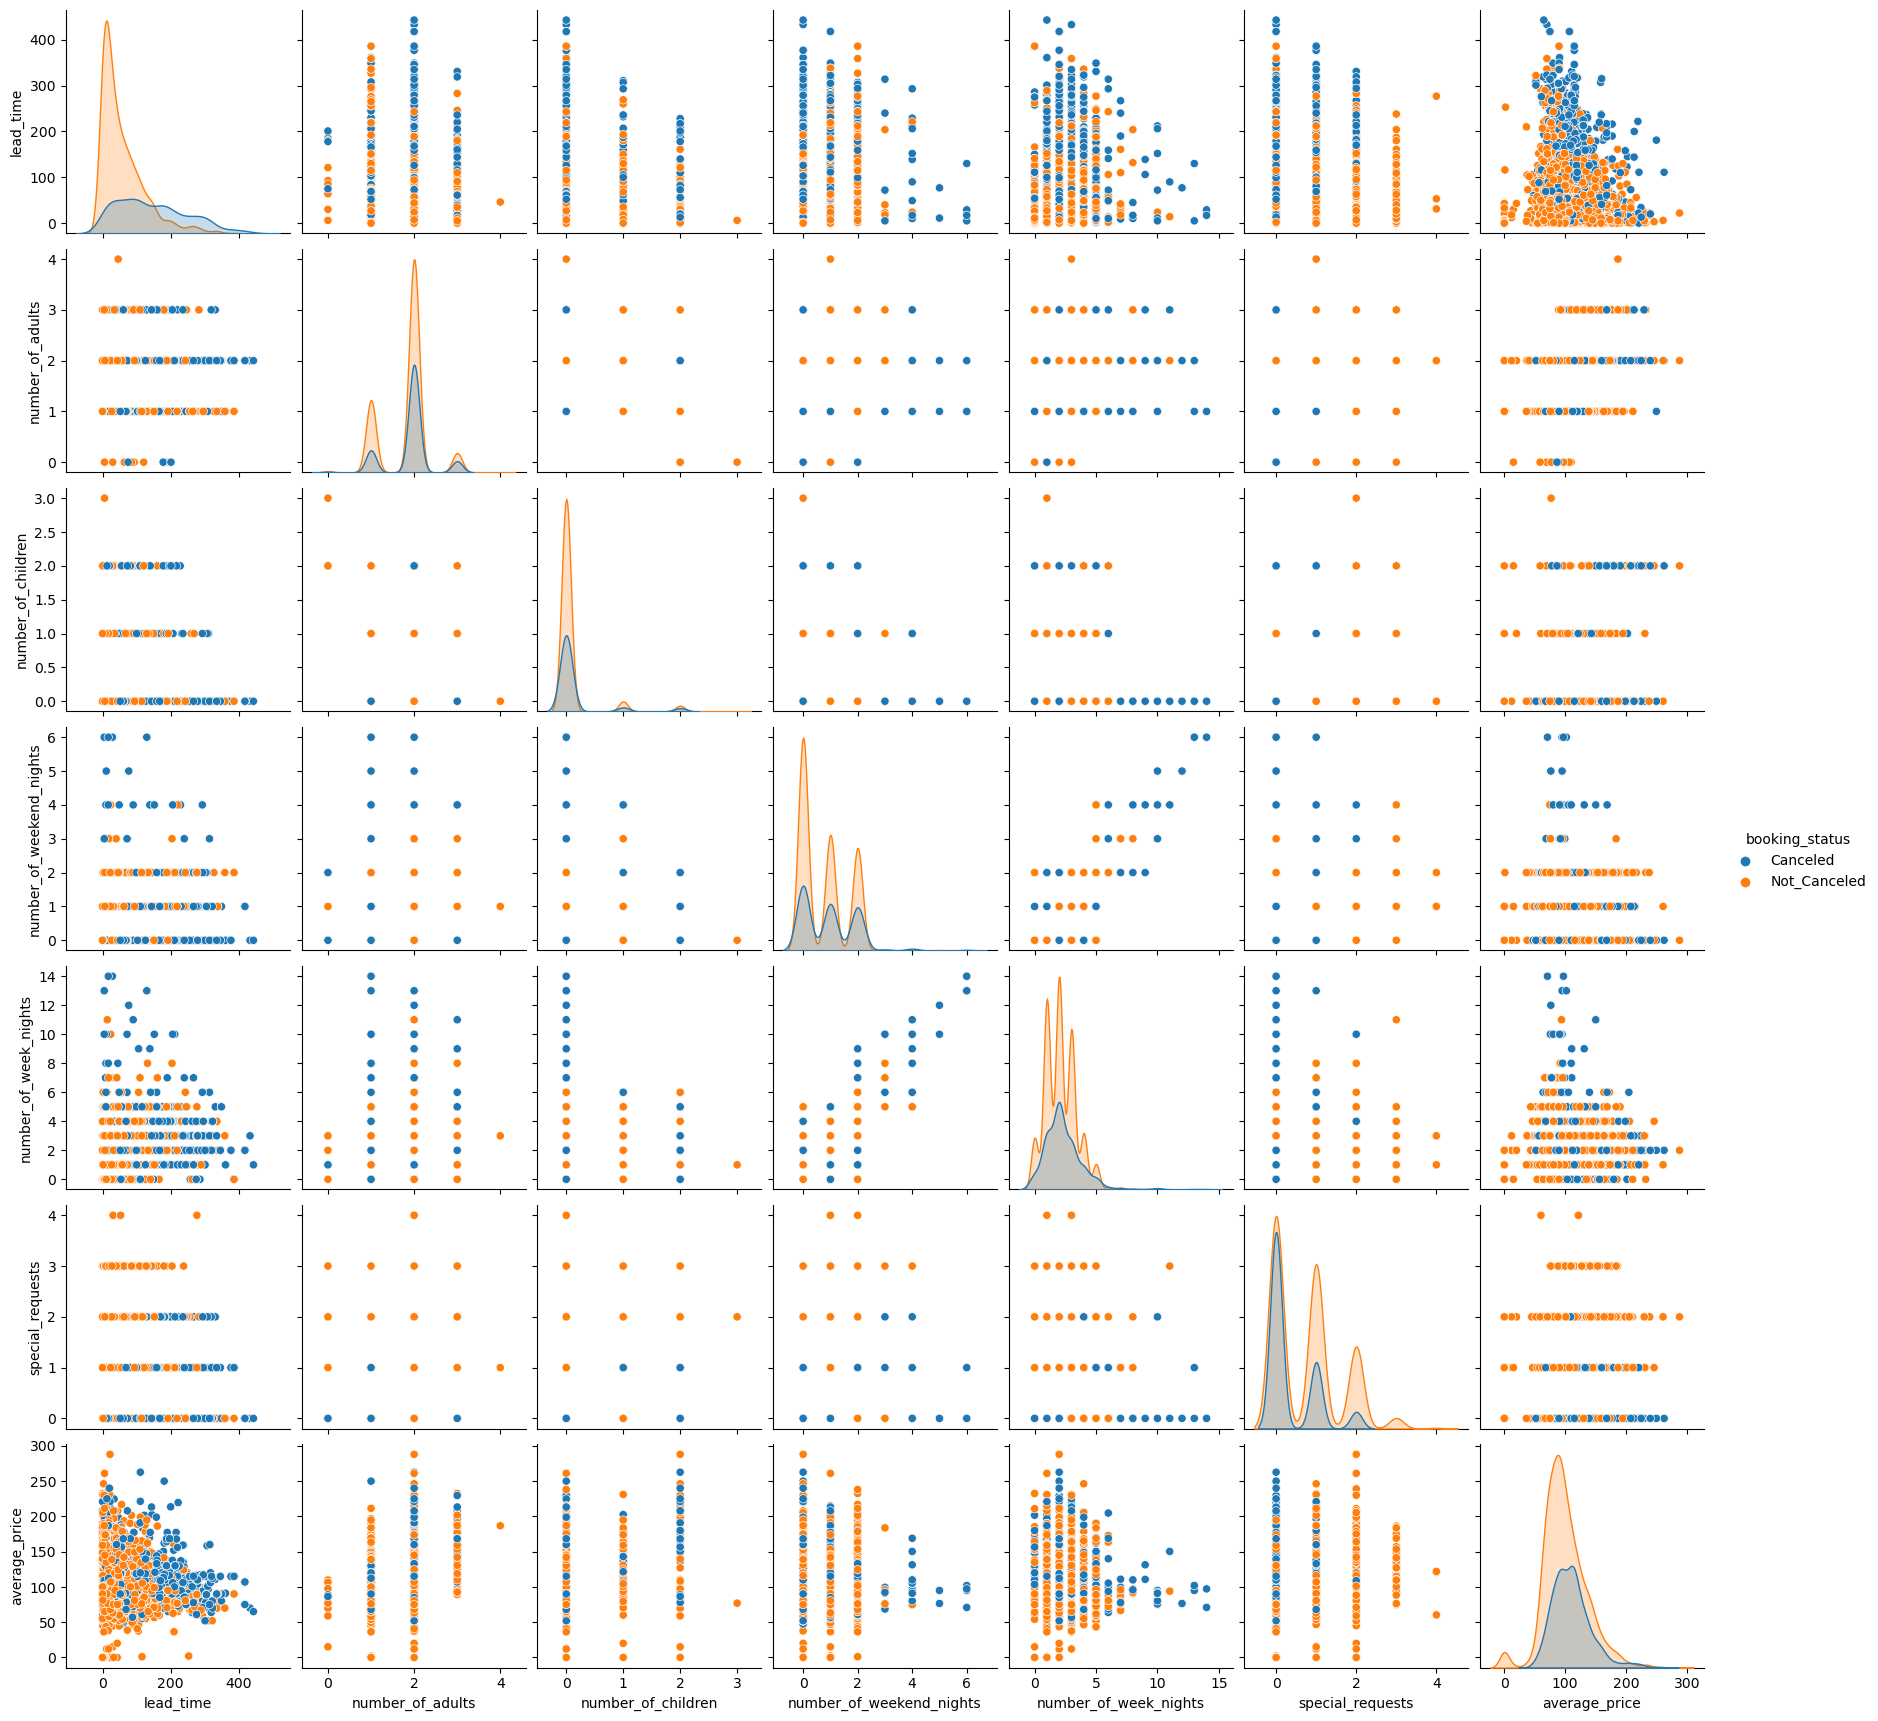

In [37]:
#Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/Pairplot_for_selected_variables.png')
plt.show()

Focused on: Predictive Booking Model: Implement a Bayesian model that predicts the likelihood of a successful booking based on variables such as lead time, number of adults and children, weekend and week nights, room type, and special requests. Use historical data to train the model and continuously update it to enhance accuracy.

GLM Implement -- Done

In [38]:
path1 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/GLM/'
os.mkdir(path1)

In [ ]:
with pm.Model() as bayesian_model:
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price', df1)
    trace = pm.sample(600, tune=150)

 #Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('./GLM/summary_GLM.png')
plt.show()
print('Done')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, average_price, special_requests, number_of_week_nights, nu

In [40]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [41]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [42]:
with bayesian_model:
    post_pred_train = pm.sample_posterior_predictive(trace, samples=800)

In [43]:
with bayesian_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=200)

C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [44]:
train_y_int_labels = train_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels_train = (post_pred_train['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels_train = predicted_labels_train[:len(train_y)]

# Calculate accuracy with integer labels for the training set
accuracy_train = accuracy_score(train_y_int_labels, predicted_labels_train)
print(f'Accuracy on training set: {accuracy_train}')

# Print classification report with integer labels for the training set
print(classification_report(train_y_int_labels, predicted_labels_train))


Accuracy on training set: 0.33375
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       533
           1       0.33      0.99      0.50       267

    accuracy                           0.33       800
   macro avg       0.42      0.50      0.26       800
weighted avg       0.44      0.33      0.18       800



In [45]:
test_y_int_labels = test_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels = (post_pred['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels = predicted_labels[:len(test_y)]

# Calculate accuracy with integer labels
accuracy = accuracy_score(test_y_int_labels, predicted_labels)
print(f'Accuracy on test set: {accuracy}')

# Print classification report with integer labels
print(classification_report(test_y_int_labels, predicted_labels))

Accuracy on test set: 0.415
              precision    recall  f1-score   support

           0       0.59      0.27      0.37       127
           1       0.35      0.67      0.46        73

    accuracy                           0.41       200
   macro avg       0.47      0.47      0.41       200
weighted avg       0.50      0.41      0.40       200



In [46]:
# List all variable names in the trace
print(trace.varnames)

['Intercept', 'lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price', 'sd_log__', 'sd']


Binomial-Beta Model

In [47]:
path2 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Binomial-Beta_Model/'
os.mkdir(path2)

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 2 tune and 10 draw iterations (4 + 20 draws total) took 3 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release.

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.532  0.128   0.407    0.657      0.057    0.043       5.0       5.0   

   r_hat  
p    inf  
Probability that 'p' is greater than 0.5: 50.00%


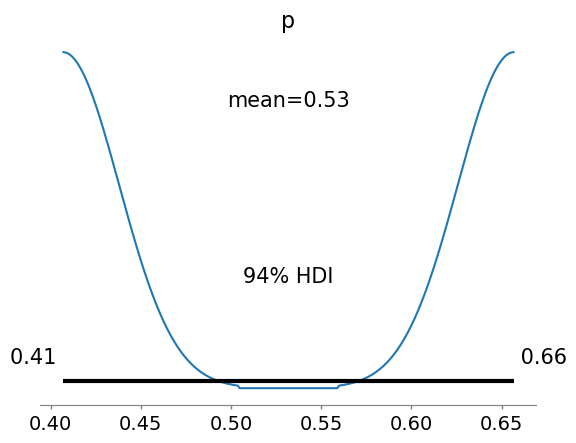

In [49]:
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.stats import percentileofscore

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as binomial_beta_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df1['booking_status']), p=p, observed=df1['booking_status'])
    

    trace = pm.sample(10, tune=2, cores=1)  # Adjust the number of samples and tuning steps as needed


print(pm.summary(trace))


az.plot_posterior(trace, var_names=['p'])
plt.savefig('./Binomial-Beta_Model/posterior_plot.png')

# Hypothesis testing

threshold = 0.5
posterior_prob_greater_than_threshold = percentileofscore(trace['p'], threshold)
print(f"Probability that 'p' is greater than {threshold}: {100 - posterior_prob_greater_than_threshold:.2f}%")

In [50]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [51]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [52]:
with binomial_beta_model:
    # Sample from the posterior predictive distribution
    post_pred_train = pm.sample_posterior_predictive(trace, samples=300)


In [53]:
# Assuming you have the trained model from the previous step
with binomial_beta_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=300)

In [54]:
import numpy as np
from scipy.stats import beta
from sklearn.metrics import accuracy_score, classification_report

# Define some_scaling_factor appropriately
some_scaling_factor = 1.0  # Adjust this based on your model's requirements

# Using 'likelihood' instead of 'y'
predicted_probs = post_pred_train['likelihood'].mean(axis=0)

# Ensure predicted_probs are within (0, 1)
epsilon = 1e-6  # Small value to prevent 0 or 1
predicted_probs = np.clip(predicted_probs, epsilon, 1 - epsilon)

alpha_train = predicted_probs * some_scaling_factor
beta_train = (1 - predicted_probs) * some_scaling_factor

# Ensure all values in alpha_train and beta_train are positive
if np.any(alpha_train <= 0) or np.any(beta_train <= 0):
    raise ValueError("Non-positive values found in alpha_train or beta_train.")

# Sample from the Beta distribution for the training set
sampled_labels_train = np.random.beta(alpha_train[:len(train_y_int_labels)], beta_train[:len(train_y_int_labels)])

# Convert probabilities to binary labels for the training set
predicted_labels_beta_train = (sampled_labels_train > 0.5).astype(int)

# Calculate accuracy with binary labels for the training set
accuracy_train_beta = accuracy_score(train_y_int_labels, predicted_labels_beta_train)
print(f'Accuracy on training set (Binomial-Beta Model): {accuracy_train_beta}')
print(classification_report(train_y_int_labels, predicted_labels_beta_train))

Accuracy on training set (Binomial-Beta Model): 0.329125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5367
           1       0.33      1.00      0.50      2633

    accuracy                           0.33      8000
   macro avg       0.16      0.50      0.25      8000
weighted avg       0.11      0.33      0.16      8000



C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(f"Length of train_y_int_labels: {len(train_y_int_labels)}")
print(f"Length of predicted_labels_beta_train: {len(predicted_labels_beta_train)}")

Length of train_y_int_labels: 8000
Length of predicted_labels_beta_train: 8000


In [56]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


some_scaling_factor = 1.0  # Adjust this based on your model's requirements

predicted_probabilities = post_pred['likelihood'].mean(axis=0)

predicted_probabilities = predicted_probabilities[:len(test_y)]

# Ensure predicted_probabilities are within (0, 1)
epsilon = 1e-6  # Small value to prevent 0 or 1
predicted_probabilities = np.clip(predicted_probabilities, epsilon, 1 - epsilon)

alpha = predicted_probabilities * some_scaling_factor
beta_value = (1 - predicted_probabilities) * some_scaling_factor

# Check if alpha and beta_value are valid (all values should be > 0)
if np.any(alpha <= 0) or np.any(beta_value <= 0):
    raise ValueError("Invalid values in alpha or beta_value. Adjust some_scaling_factor or predicted_probabilities.")

# Sample from the Beta distribution for the test set
sampled_labels = np.random.beta(alpha, beta_value, size=len(test_y))

# Convert probabilities to binary labels for the test set
predicted_labels_beta = (sampled_labels > 0.5).astype(int)


accuracy_beta = accuracy_score(test_y_int_labels, predicted_labels_beta)
print(f'Accuracy on test set (Binomial-Beta Model): {accuracy_beta}')

print(classification_report(test_y_int_labels, predicted_labels_beta))

Accuracy on test set (Binomial-Beta Model): 0.3335
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1333
           1       0.33      1.00      0.50       667

    accuracy                           0.33      2000
   macro avg       0.17      0.50      0.25      2000
weighted avg       0.11      0.33      0.17      2000



C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Poisson-Gamma Model

In [49]:
path3 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Poisson_Gamma_Model/'
os.mkdir(path3)

In [51]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df1 with the required columns

with pm.Model() as poisson_gamma_model:
    pm.glm.GLM.from_formula(
        'booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price',
        df1,
        family=pm.glm.families.Poisson(link=pm.glm.families.links.log)
    )
    trace = pm.sample(10, tune=2)

# Check the summary of the Bayesian model
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('./Poisson_Gamma_Model/summary_Poisson_Gamma.png')
plt.show()
print('Done')


AttributeError: module 'pymc3.glm.families' has no attribute 'links'

In [59]:
with bayesian_model:
    post_pred_test = pm.sample_posterior_predictive(trace, samples=5)

# Convert Poisson counts to binary labels for the test set
predicted_labels_test = (post_pred_test['likelihood'].mean(axis=0) > 0.5).astype(int)

# Ensure the size of predicted_labels_test matches the size of the test set
predicted_labels_test = predicted_labels_test[:len(test_data)]

actual_labels_test = (test_data['booking_status'] == 'Canceled').astype(int)

# Check the lengths
print(f"Length of actual_labels_test: {len(actual_labels_test)}")
print(f"Length of predicted_labels_test: {len(predicted_labels_test)}")

# Ensure both arrays have the same length
if len(actual_labels_test) != len(predicted_labels_test):
    raise ValueError("The number of actual and predicted labels do not match.")

# Calculate accuracy with binary labels for the test set
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)
print(f'Accuracy on test set: {accuracy_test}')

# Print classification report with binary labels for the test set
print(classification_report(actual_labels_test, predicted_labels_test))


C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Length of actual_labels_test: 2000
Length of predicted_labels_test: 2000
Accuracy on test set: 0.509
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      1333
           1       0.36      0.58      0.44       667

    accuracy                           0.51      2000
   macro avg       0.52      0.53      0.50      2000
weighted avg       0.58      0.51      0.52      2000



Exponential-Gamma Model

In [60]:
path4 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Exponential-Gamma_Model/'
os.mkdir(path4)

C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:1813: RuntimeWarning: invalid value encountered in double_scalars
  return sum(inputs)


Sampling 2 chains for 800 tune and 1_000 draw iterations (1_600 + 2_000 draws total) took 7 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


         mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rate  5000.35  50.645  4896.742  5088.487      1.692    1.197     899.0   

      ess_tail  r_hat  
rate    1274.0    1.0  


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


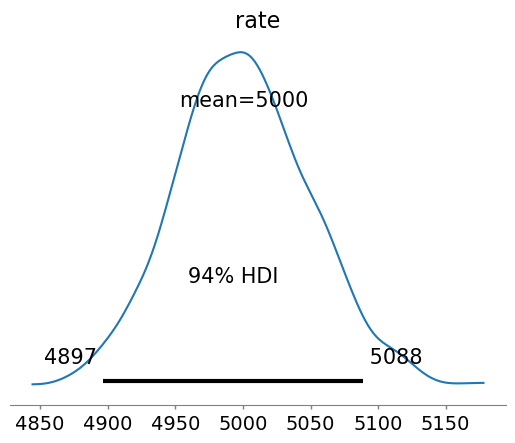

In [61]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Exponential likelihood
    likelihood = pm.Exponential('likelihood', lam=rate, observed=df1['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=800, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])
plt.savefig('./Exponential-Gamma_Model/Exponential-Gamma_Model.png')

C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Got error No model on context stack. trying to find log_likelihood in translation.
posterior predictive variable likelihood's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable test_likelihood's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
C:\Users\Jishan\anaconda3\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


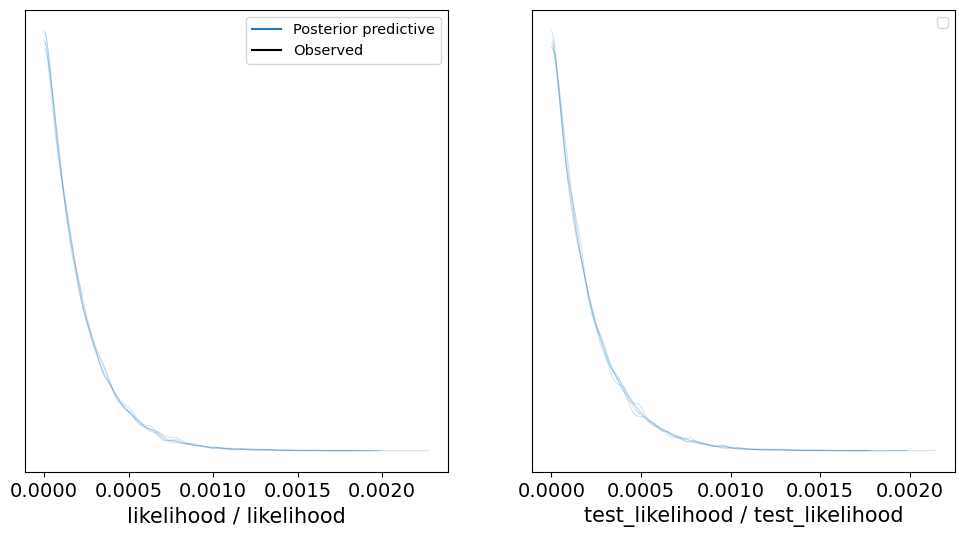

In [62]:
import pymc3 as pm
import arviz as az
import numpy as np
import theano.tensor as tt

df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

# Calculate the mean outside the model context
rate_posterior_mean = trace['rate'].mean(axis=0)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Create a deterministic variable using the computed mean
    rate_posterior = pm.Deterministic('rate_posterior', tt.as_tensor_variable(rate_posterior_mean))

    # Exponential likelihood for the test data
    test_likelihood = pm.Exponential('test_likelihood', lam=rate_posterior, observed=df1['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)

az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)
plt.savefig('./Exponential-Gamma_Model/gr1.png')

Bayesian logistic regression model

In [52]:
path5 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/LogisticRegression/'
os.mkdir(path5)

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 6 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b7, b6, b5, b4, b3, b2, b1, b0]


Sampling 4 chains for 2 tune and 6 draw iterations (8 + 24 draws total) took 25 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only divergin

     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
b0 -0.012  0.557  -0.637    0.739      0.097    0.069      33.0      24.0   
b1 -0.016  0.207  -0.284    0.245      0.036    0.026      33.0      24.0   
b2 -0.401  0.378  -0.931    0.051      0.066    0.047      33.0      24.0   
b3  0.268  0.402  -0.405    0.586      0.070    0.050      33.0      24.0   
b4 -0.344  0.549  -0.904    0.406      0.095    0.068      33.0      24.0   
b5  0.092  0.569  -0.609    0.749      0.099    0.071      33.0      24.0   
b6  0.085  0.488  -0.647    0.692      0.085    0.060      33.0      24.0   
b7  0.352  0.467  -0.341    0.837      0.081    0.058      33.0      24.0   

    r_hat  
b0    inf  
b1    inf  
b2    inf  
b3    inf  
b4    inf  
b5    inf  
b6    inf  
b7    inf  


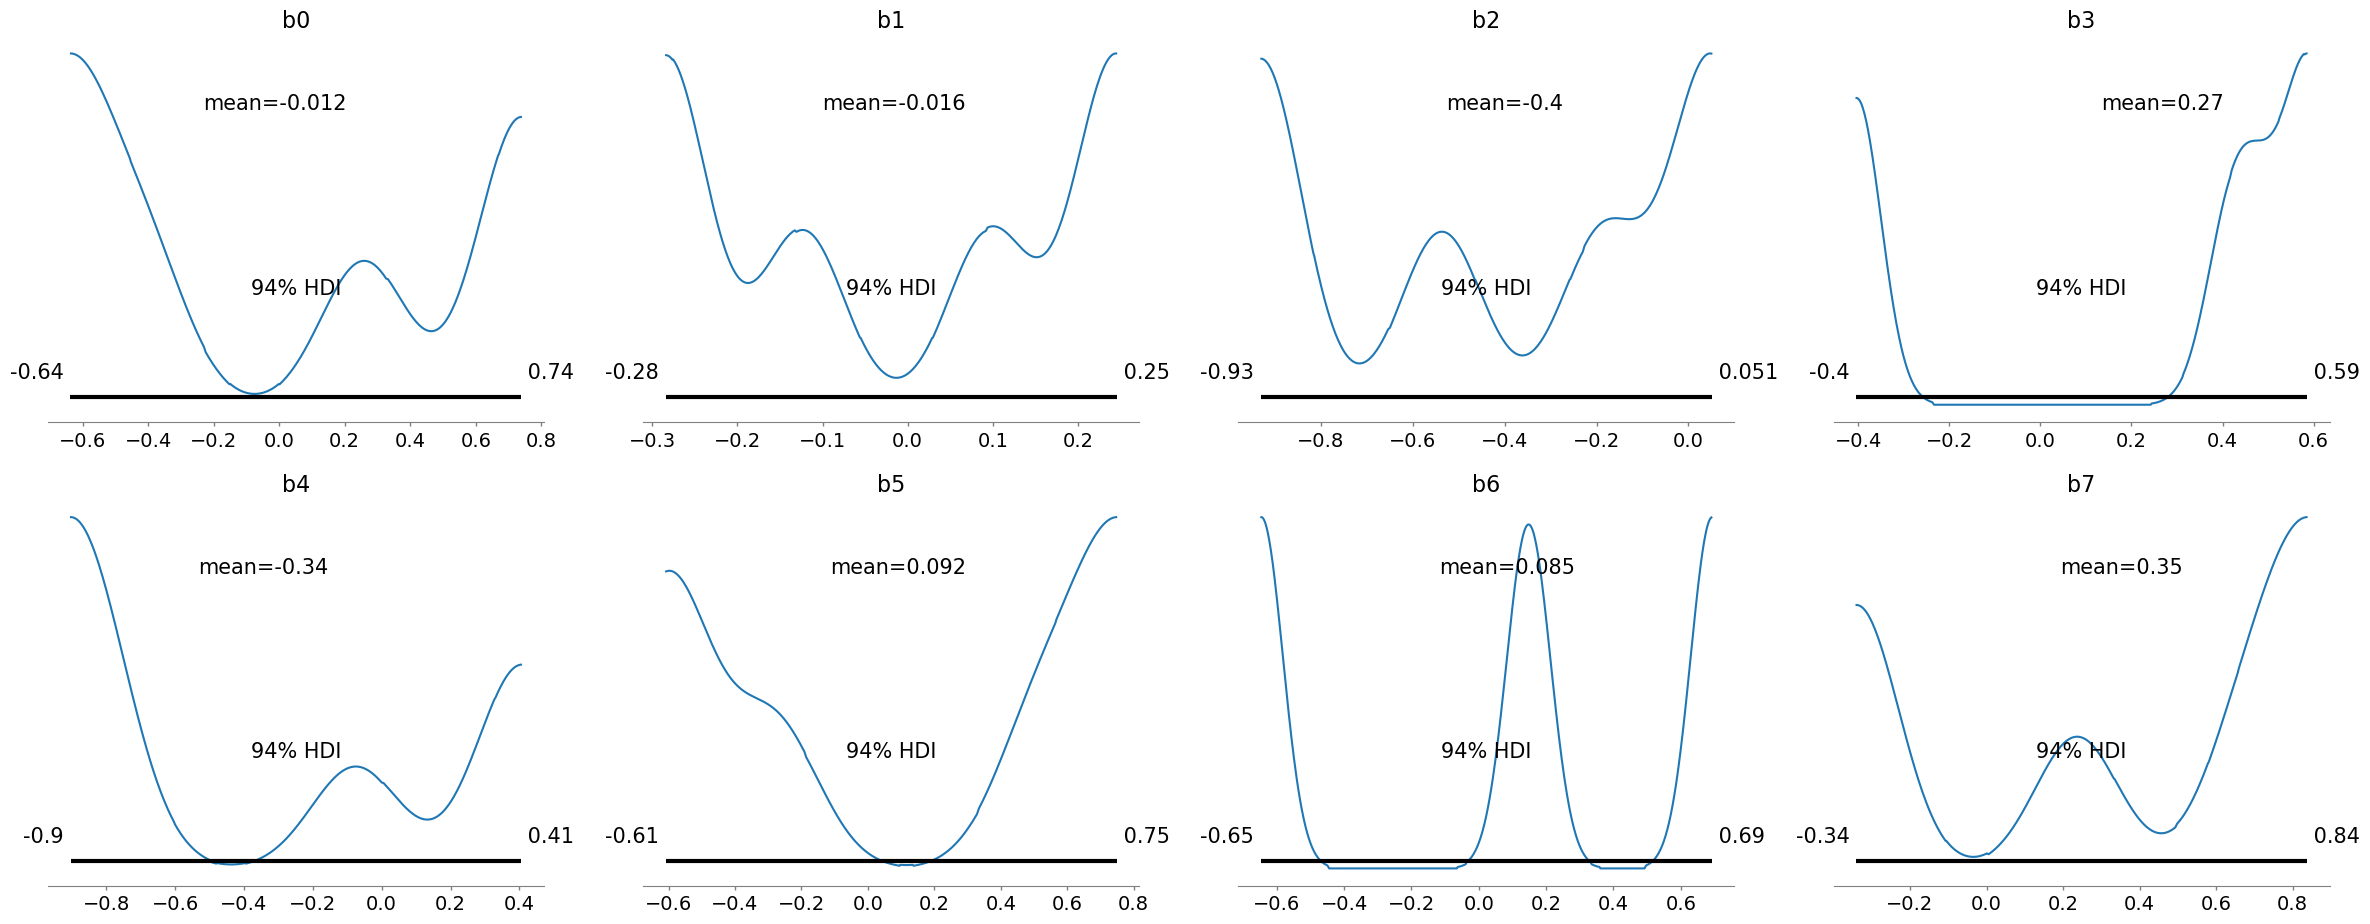

Done


In [55]:
import pymc3 as pm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df1 contains your data
label_encoder = LabelEncoder()
df1['booking_status'] = label_encoder.fit_transform(df1['booking_status'])

with pm.Model() as bayesian_model:
    # Define priors for the coefficients
    b0 = pm.Normal('b0', mu=0, sd=10)  # Intercept
    b1 = pm.Normal('b1', mu=0, sd=10)  # Coefficient for lead_time
    b2 = pm.Normal('b2', mu=0, sd=10)  # Coefficient for number_of_adults
    b3 = pm.Normal('b3', mu=0, sd=10)  # Coefficient for number_of_children
    b4 = pm.Normal('b4', mu=0, sd=10)  # Coefficient for number_of_weekend_nights
    b5 = pm.Normal('b5', mu=0, sd=10)  # Coefficient for number_of_week_nights
    b6 = pm.Normal('b6', mu=0, sd=10)  # Coefficient for special_requests
    b7 = pm.Normal('b7', mu=0, sd=10)  # Coefficient for average_price
    
    # Define the linear combination with logistic link function
    p = pm.math.invlogit(b0 + b1 * df1['lead_time'] + b2 * df1['number_of_adults'] + b3 * df1['number_of_children'] + b4 * df1['number_of_weekend_nights'] + b5 * df1['number_of_week_nights'] + b6 * df1['special_requests'] + b7 * df1['average_price'])
    
    # Define the likelihood using Bernoulli distribution
    likelihood = pm.Bernoulli('likelihood', p=p, observed=df1['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(6,tune=2)

# Check the summary of the Bayesian model
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('./LogisticRegression/summary_LogisticRegression.png')
plt.show()
print('Done')

Exponential-Gamma model

In [ ]:
path6 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/ExponentialGamma/'
os.mkdir(path6)

In [54]:
import pymc3 as pm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df1 contains your data
label_encoder = LabelEncoder()
df1['booking_status'] = label_encoder.fit_transform(df1['booking_status'])

with pm.Model() as bayesian_model:
    # Define priors for the coefficients
    b0 = pm.Normal('b0', mu=0, sd=10)  # Intercept
    b1 = pm.Normal('b1', mu=0, sd=10)  # Coefficient for lead_time
    b2 = pm.Normal('b2', mu=0, sd=10)  # Coefficient for number_of_adults
    b3 = pm.Normal('b3', mu=0, sd=10)  # Coefficient for number_of_children
    b4 = pm.Normal('b4', mu=0, sd=10)  # Coefficient for number_of_weekend_nights
    b5 = pm.Normal('b5', mu=0, sd=10)  # Coefficient for number_of_week_nights
    b6 = pm.Normal('b6', mu=0, sd=10)  # Coefficient for special_requests
    b7 = pm.Normal('b7', mu=0, sd=10)  # Coefficient for average_price
    
    # Define the linear combination
    mu = b0 + b1 * df1['lead_time'] + b2 * df1['number_of_adults'] + b3 * df1['number_of_children'] + b4 * df1['number_of_weekend_nights'] + b5 * df1['number_of_week_nights'] + b6 * df1['special_requests'] + b7 * df1['average_price']
    
    # Define the precision parameter
    precision = pm.Gamma('precision', alpha=1, beta=1)
    
    # Define the likelihood using Exponential distribution
    likelihood = pm.Exponential('likelihood', lam=precision, observed=mu)
    
    # Sample from the posterior distribution with 'adapt_diag' initialization
    trace = pm.sample(10, tune=2, init='adapt_diag', random_seed=42)

# Check the summary of the Bayesian model
print(pm.summary(trace))
pm.plot_posterior(trace)
print('Done')

C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pr

ValueError: Not enough samples to build a trace.